# Data Science Project - Price Forecast

- The main goal of this exercise is to be able to forecast boat prices that will be sold based in its features such as: year, size, kind of the boat,new or used and material that will be used

- Data base: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=share_link

### Data Science Project - Step by Step 

- Step 1: Understanding of the Project's goal
        
- Step 2: Understanding of the Business and the company
    - Forecast of a boat based in its features
- Step 3: Extracting data
- Step 4: Data processing
- Step 5: Exploratory Analysis
- Step 6: Modeling + Algorithms
- Step 7: Results Analysis

![title](tabelas.png)

In [1]:
# Step 1: Understanding of the Project's goal
        
# Step 2: Understanding of the Business and the company
    # Forecast of a boat based in its features
# Step 3: Extracting data
import pandas as pd

table = pd.read_csv("barcos_ref.csv") #since the code file and this file are in the same folder you don't have to insert the whole path here
display(table)

,Preco,TipoBarco,TipoVenda,Ano,Comprimento,Largura,Material
0,3490,1,1,2020,4.00,1.50,1
1,3399,2,1,2019,3.55,1.46,2
2,3600,3,2,1999,6.20,2.38,2
3,3500,2,2,1987,4.35,1.75,3
4,3500,4,2,2004,4.70,2.00,3
...,...,...,...,...,...,...,...
7644,5000,7,2,1974,7.20,2.70,3
7645,4999,4,2,1980,6.00,2.10,3
7646,4950,2,2,1984,6.00,1.62,5
7647,4499,4,1,2020,4.40,1.80,3


In [2]:
# Step 4: Data processing
print(table.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7649 entries, 0 to 7648
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Preco        7649 non-null   int64  
 1   TipoBarco    7649 non-null   int64  
 2   TipoVenda    7649 non-null   int64  
 3   Ano          7649 non-null   int64  
 4   Comprimento  7649 non-null   float64
 5   Largura      7649 non-null   float64
 6   Material     7649 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 418.4 KB
None


,Preco
Preco,1.000000
TipoBarco,0.293137
TipoVenda,0.041266
Ano,0.113385
Comprimento,0.578353
Largura,0.557621
Material,-0.036476


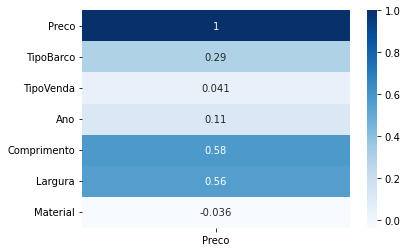

In [7]:
# Step 5: Exploratory Analysis
correl = table.corr()[['Preco']]
display(correl)

import seaborn as sns
import matplotlib.pyplot as plt

#create graphic
sns.heatmap(correl, cmap='Blues', annot=True)
#show graphich
plt.show()

In [9]:
# Step 6: Modeling + Algorithms
    #split base in x and y
    
y = table['Preco']
x = table.drop('Preco', axis=1)

#train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

In [12]:
#import artificial intelligence
#linear regression and decision tree
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#creation of artificial intelligence
model_linearregression = LinearRegression()
model_randomforest = RandomForestRegressor()

#train artificial intelligence
model_linearregression.fit(x_train, y_train)
model_randomforest.fit(x_train,y_train)

RandomForestRegressor()

In [15]:
# Step 7: Results Analysis

# choose best model -> R²
from sklearn.metrics import r2_score

forecast_linearregression = model_linearregression.predict(x_test)
forecast_randomforest = model_randomforest.predict(x_test)

print(r2_score(y_test,forecast_linearregression))
print(r2_score(y_test,forecast_randomforest))



0.4372781415347261
0.8392567006345896


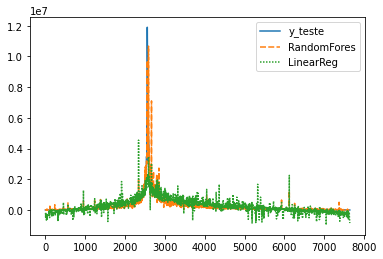

In [17]:
# show forecasts
aux_table = pd.DataFrame()
aux_table['y_teste'] = y_test
aux_table['RandomFores'] = forecast_randomforest
aux_table['LinearReg'] = forecast_linearregression


sns.lineplot(data=aux_table)
plt.show()

In [19]:
# new forecasts with artificial intelligence
new_table = pd.read_csv('novos_barcos.csv') #new boats that need prices
display(new_table)

forecast = model_randomforest.predict(new_table)
print(forecast)

,TipoBarco,TipoVenda,Ano,Comprimento,Largura,Material
0,2,3,2023,3.0,1.5,1
1,2,1,2023,3.8,1.9,2
2,3,2,1999,6.2,3.0,2


[ 7963.75519048 12522.75       20428.85      ]
